# Titanic: Machine Learning from Disaster

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load and process titanic data (source kaggle)
df = pd.read_csv("Titanictrain.csv",index_col='PassengerId')
df.shape

(891, 11)

In [3]:
# restrict to fields of interest
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
# map sex to 0, 1 values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# creat a new variable which combines Parch and SibSp
df['Family'] = df['Parch'] + df['SibSp']
df['Family'].loc[df['Family'] > 0] = 1
df['Family'].loc[df['Family'] == 0] = 0
# drop SibSp & Parch
df = df.drop(['SibSp','Parch'], axis=1)
# drop missing data
df = df.dropna()
y = df['Survived']
X = df.drop('Survived',axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Family
PassengerId,,,,,,
1,0,3,0,22.0,7.2500,1
2,1,1,1,38.0,71.2833,1
3,1,3,1,26.0,7.9250,0
4,1,1,1,35.0,53.1000,1
5,0,3,0,35.0,8.0500,0


This dataset includes 11 observations and 891 variables. I selected 7 observations, Pclass, Sex, Age, SibSp, Parch, Fare, and Survived. Then, I mapped Sex to dummy variables, using 0 to denote males and 1 to denote females. I also created a new variable, "Family", which combined "Parch" and "SibSp". Next, I dropped the missing data in the new dataset. Finally, I used Survived as the target variable and other observations as features.

## Explore Data

### Pearson Correlation Heatmap

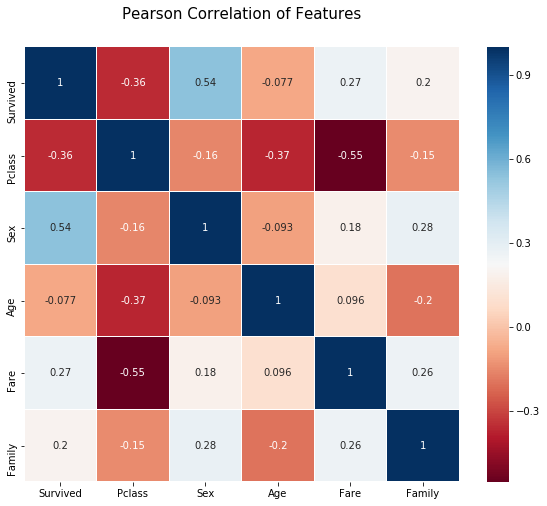

In [4]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

From this correlation heatmap, we can see that sex, fare and family have a positive relationship with survival rate, which means female passengers, passengers holding expensive tickets and passengers traveling with families are more likely to survive. Besides, class of travel and survival rate are negatively related, meaning the survival rate of upper-class passengers are higher than others.

### 1. Pclass

In [5]:
df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.655914
2,0.479769
3,0.239437


Passengers from class 1 were more likely to survive, whose survival rate was more than 65%. While people from class 2 and class 3 had a lower possibility of surviving, which was 48% and 24% respectively.

### 2. Sex

In [6]:
df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
0,0.205298
1,0.754789


The survival rate of women was 75%, which was three times more than that of men.

### 3. Family

In [7]:

df[['Family','Survived']].groupby(['Family']).mean()

,Survived
Family,
0,0.321782
1,0.516129


Passengers traveling with siblings, spouse, parents or children were more likely to survive than people who traveled alone.

### 4. Age

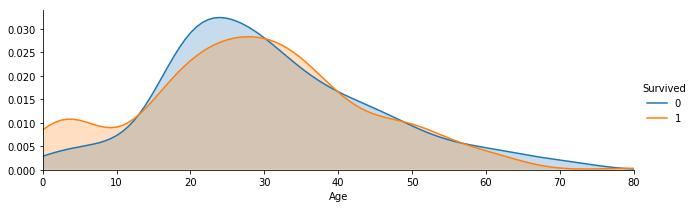

In [8]:
facet = sns.FacetGrid(df, hue="Survived", aspect=3)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

This plot shows the age distribution of survival rate. Children from 0 to 10 years old were most likely to survive.

## Classification

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

### 1. K-Nearest Neighbors

In [10]:
nmc = 100
knn_trainScores = np.zeros(nmc)
knn_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    knn = KNeighborsClassifier().fit(X_train, y_train)
    knn_trainScores[i] = knn.score(X_train, y_train)
    knn_testScores[i]  = knn.score(X_test, y_test)
print("The train score is", np.mean(knn_trainScores))
print("The test score is", np.mean(knn_testScores))

The train score is 0.7787102803738318
The test score is 0.6775977653631285


### 2. Navies Bayes

In [11]:
nmc = 100
nb_trainScores = np.zeros(nmc)
nb_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    nb = GaussianNB().fit(X_train, y_train)
    nb_trainScores[i] = nb.score(X_train, y_train)
    nb_testScores[i]  = nb.score(X_test, y_test)
print("The train score is", np.mean(nb_trainScores))
print("The test score is", np.mean(nb_testScores))

The train score is 0.7698504672897198
The test score is 0.7673184357541899


### 3. Decision Tree

In [12]:
nmc = 100
tree_trainScores = np.zeros(nmc)
tree_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    tree = DecisionTreeClassifier().fit(X_train, y_train)
    tree_trainScores[i] = tree.score(X_train, y_train)
    tree_testScores[i]  = tree.score(X_test, y_test)
print("The train score is", np.mean(tree_trainScores))
print("The test score is", np.mean(tree_testScores))

The train score is 0.9888971962616823
The test score is 0.7674301675977653


### 4. Random Forests

In [13]:
nmc = 100
rfc_trainScores = np.zeros(nmc)
rfc_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    rfc = RandomForestClassifier().fit(X_train, y_train)
    rfc_trainScores[i] = rfc.score(X_train, y_train)
    rfc_testScores[i]  = rfc.score(X_test, y_test)   
print("The train score is", np.mean(rfc_trainScores))
print("The test score is", np.mean(rfc_testScores))

The train score is 0.9704485981308411
The test score is 0.7928491620111733


### 5. Gradient Boosting Classifier

In [14]:
nmc = 100
gbc_trainScores = np.zeros(nmc)
gbc_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    gbc = MLPClassifier().fit(X_train, y_train)
    gbc_trainScores[i] = gbc.score(X_train, y_train)
    gbc_testScores[i]  = gbc.score(X_test, y_test)   
print("The train score is", np.mean(gbc_trainScores))
print("The test score is", np.mean(gbc_testScores))

The train score is 0.8026915887850465
The test score is 0.7746927374301675


### 6. Logistic Regression

In [15]:
nmc = 100
log_trainScores = np.zeros(nmc)
log_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    logreg = LogisticRegression().fit(X_train, y_train)
    log_trainScores[i] = logreg.score(X_train, y_train)
    log_testScores[i]  = logreg.score(X_test, y_test)   
print("The train score is", np.mean(log_trainScores))
print("The test score is", np.mean(log_testScores))

The train score is 0.7957009345794392
The test score is 0.7884916201117318


### 7. Support Vector Machines

In [16]:
nmc = 100
svm_trainScores = np.zeros(nmc)
svm_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    svm = LinearSVC().fit(X_train, y_train)
    svm_trainScores[i] = svm.score(X_train, y_train)
    svm_testScores[i]  = svm.score(X_test, y_test)   
print("The train score is", np.mean(svm_trainScores))
print("The test score is", np.mean(svm_testScores))

The train score is 0.7203551401869158
The test score is 0.7182122905027932


### 8. Neural Network Model

In [17]:
nmc = 100
mlp_trainScores = np.zeros(nmc)
mlp_testScores  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    mlp = MLPClassifier().fit(X_train, y_train)
    mlp_trainScores[i] = mlp.score(X_train, y_train)
    mlp_testScores[i]  = mlp.score(X_test, y_test)   
print("The train score is", np.mean(mlp_trainScores))
print("The test score is", np.mean(mlp_testScores))

The train score is 0.8003551401869159
The test score is 0.7756424581005587


### Compare the Accuracy

In [18]:
score = [np.mean(knn_testScores), np.mean(nb_testScores), np.mean(tree_testScores),
         np.mean(rfc_testScores), np.mean(gbc_testScores), np.mean(log_testScores),
         np.mean(svm_testScores), np.mean(mlp_testScores)]
name = ['K-Nearest Neighbors', 'Navies Bayes', 'Decision Tree',
        'Random Forests', 'Gradient Boosting Classifier', 'Logistic Regression',
        'Support Vector Machines', 'Neural Network Model']
model = pd.DataFrame({'Name': name, 'Score': score})
model.sort_values(by='Score', ascending=False, inplace=True)
model.reset_index(drop=True)

,Name,Score
0,Random Forests,0.792849
1,Logistic Regression,0.788492
2,Neural Network Model,0.775642
3,Gradient Boosting Classifier,0.774693
4,Decision Tree,0.767430
5,Navies Bayes,0.767318
6,Support Vector Machines,0.718212
7,K-Nearest Neighbors,0.677598


Text(0.5, 1.0, 'Machine Learning Algorithm Accuracy Score \n')

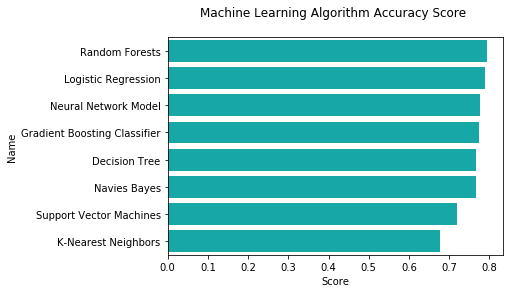

In [19]:
sns.barplot(x='Score', y='Name', data = model, color='c')
plt.title('Machine Learning Algorithm Accuracy Score \n')

By looking at the test scores of eight models, we can see that random forests model has the highest test score, so this model can be used to predict which passengers would have survived the tragedy.

### Feature Importance

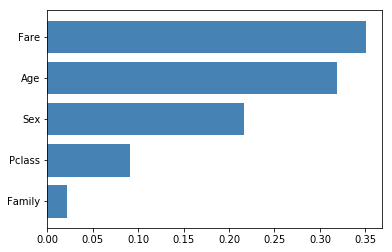

In [20]:
pd.Series(rfc.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='steelblue')

The important features of random forests model are fare, age and sex.